# Flow Of Project
# 1 Import Data
# 2 Proprocess Data
# 3 Visualize Data
# 4 Train test split
# 5 Train Model and Avualivation
# 6 Prediction System with Web app

# Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

C:\Users\akash pandey\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
medical_df = pd.read_csv('insurance.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# About the Data:
age: age of the insured person (numeric)                                          
sex: gender of the insured person (categorical: male/female)                                     
bmi: body mass index of the insured person (numeric)                                               
children: number of children covered by the insurance plan (numeric)                                  
smoker: whether or not the insured person is a smoker (categorical: yes/no)                                  
region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest)                                            
charges: the insurance charges/costs billed to the insured person (numeric)                                                         

# Exploring Data & Analysing Data

In [4]:
medical_df.shape

(1338, 7)

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualisation

## The code below use a loop to create countplot for the categorical features

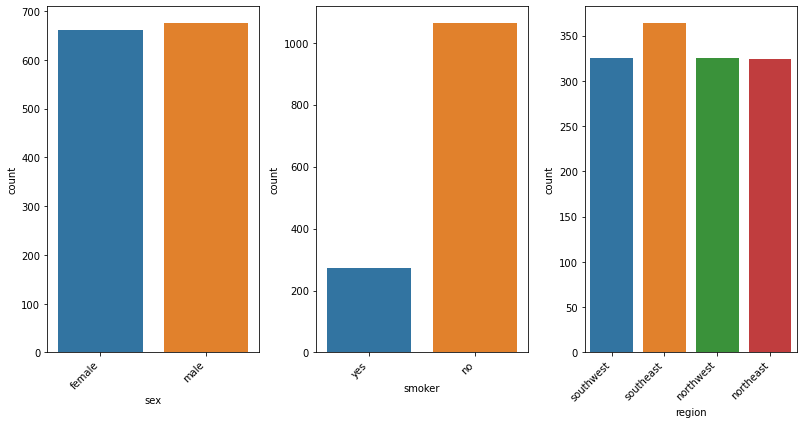

In [7]:
cols = 4
rows = 1
fig = plt.figure(figsize= (15,6))
all_categs = medical_df.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=medical_df[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

<Figure size 216x216 with 0 Axes>

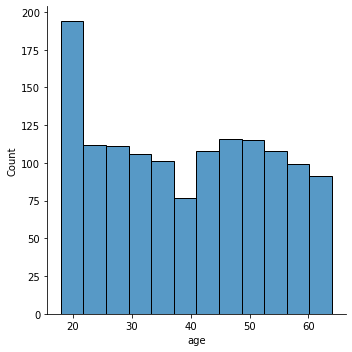

In [8]:
plt.figure(figsize=(3, 3))
sns.displot(data=medical_df,x='age')

<Figure size 216x216 with 0 Axes>

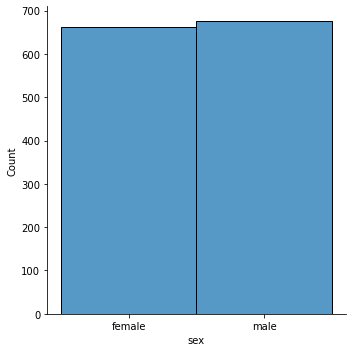

In [9]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist')

In [10]:
medical_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 288x288 with 0 Axes>

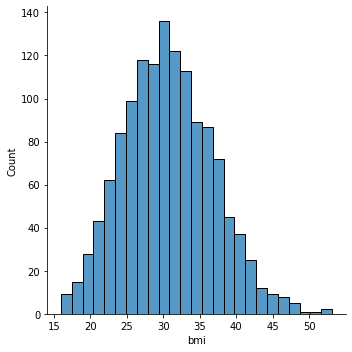

In [12]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')
plt.show()

In [13]:
medical_df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<Figure size 216x216 with 0 Axes>

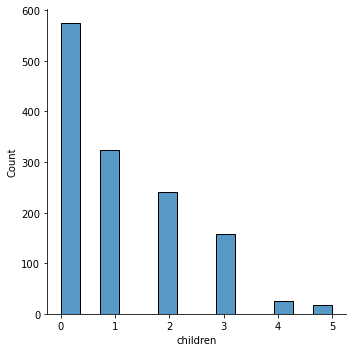

In [14]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='children')

In [15]:
medical_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

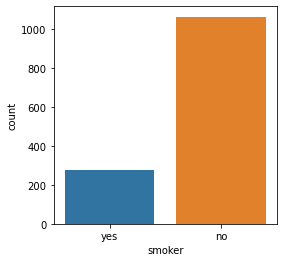

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='smoker')
plt.show()

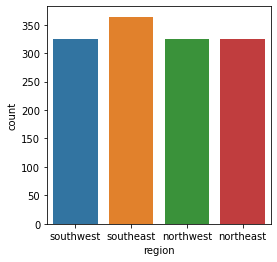

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='region')
plt.show()

In [18]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


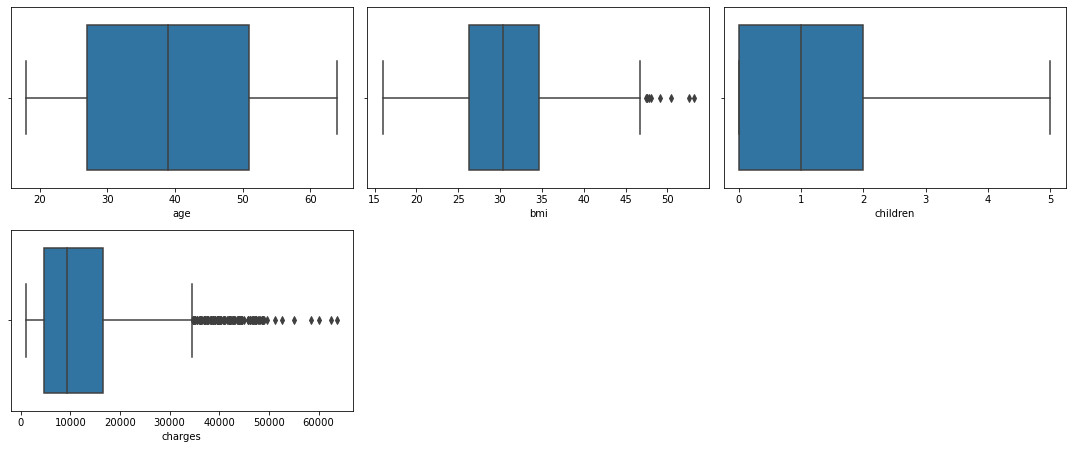

In [19]:
cols = 3
rows = 3
num_cols = medical_df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=medical_df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

### Calculate the IQR as follows:
1. Calculate the first and third quartile (Q1 and Q3)
2. Calculate the interquartile range, IQR = Q3-Q1
3. Find the lower bound which is Q1*1.5
4. Find the upper bound which is Q3*1.5
5. Replace the data points which lie outside this range.
6. They can be replaced by mean or median.

## BIVARIATE ANALYSIS

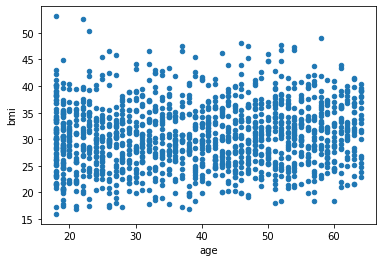

In [20]:
#Scatter Plot
medical_df.plot.scatter(x="age",y="bmi")
plt.show()

## Corelation Matrix

<AxesSubplot:>

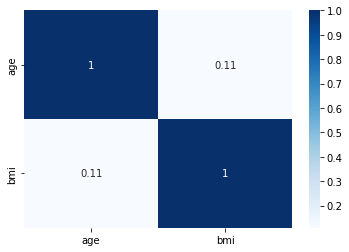

In [21]:
sns.heatmap(medical_df[["age","bmi"]].corr(), annot=True, cmap="Blues")

Text(0.5, 1.0, 'Correlation Matrix')

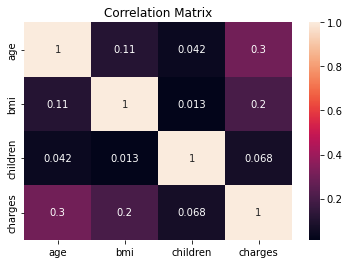

In [22]:
 sns.heatmap(medical_df.corr(), annot =True)
 plt.title('Correlation Matrix')

## How many Male anf Female candidates belong from different regions

In [23]:
cross_tab_prop = pd.crosstab(index = medical_df['sex'], columns = medical_df['region'], normalize = "index")
cross_tab_prop

region,northeast,northwest,southeast,southwest
sex,,,,
female,0.243202,0.247734,0.264350,0.244713
male,0.241124,0.238166,0.279586,0.241124


In [24]:
new_df3=medical_df[(medical_df["region"]=="southeast")|(medical_df["region"]=="southwest")|(medical_df["region"]=="northwest")|
          (medical_df["region"]=="northeast")]

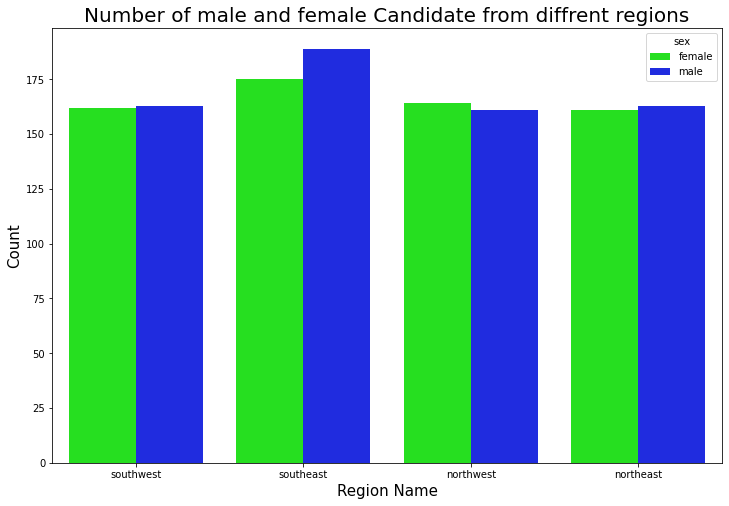

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(x='region',hue='sex',data=new_df3,palette='hsv')
plt.title("Number of male and female Candidate from diffrent regions",fontsize=20)
plt.xlabel("Region Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# convert categorical column to numerical

In [26]:
medical_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [27]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [28]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# Linear Regression

Train and Test

In [29]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [31]:
X_train.shape

(1204, 6)

In [32]:
X_test.shape

(134, 6)

In [33]:
lg = LinearRegression()
lg.fit(X_train,y_train) # 80 model will be train
y_pred = lg.predict(X_test) # 10 model will be predicted
# print(y_pred)

In [34]:
y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test,y_pred)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)

Test RMSE: 5806.643593680347
Test R-squared: 0.7058997983752825


# Polynomial Regression

In [35]:
degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R-squared for training and testing sets
train_r_squared = model.score(X_train_poly, y_train)
test_r_squared = model.score(X_test_poly, y_test)
# print("Train R-squared:", train_r_squared)
print("Test R-squared:", test_r_squared)

Test RMSE: 4753.5029540441055
Test R-squared: 0.8029064018887389


# Lasso Regression 

In [36]:
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed
lasso_model.fit(X_train, y_train)

# Model Evaluation
# Predict on training and testing sets
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

# Calculate RMSE for training and testing sets
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))

print("Test RMSE (Lasso):", test_rmse_lasso)

# Calculate R-squared for training and testing sets
train_r_squared_lasso = lasso_model.score(X_train, y_train)
test_r_squared_lasso = lasso_model.score(X_test, y_test)

print("Test R-squared (Lasso):", test_r_squared_lasso)

Test RMSE (Lasso): 5806.577887612646
Test R-squared (Lasso): 0.7059064542197868


# Ridge Regression

In [37]:
# Model Training - Ridge Regression
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Model Evaluation
# Predict on training and testing sets
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

# Calculate RMSE for training and testing sets
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

print("Ridge Test RMSE:", test_rmse_ridge)

# Calculate R-squared for training and testing sets
train_r_squared_ridge = ridge_model.score(X_train, y_train)
test_r_squared_ridge = ridge_model.score(X_test, y_test)

print("Ridge Test R-squared:", test_r_squared_ridge)

Ridge Test RMSE: 5800.988697872384
Ridge Test R-squared: 0.7064723481275937


## printing all algorithm with it accuracy 

In [38]:
# initialise data of lists.
data = {'Algorithms':['Linear Regression','Polynomial Regression', 'Lasso Regression', 'Ridge Regression'],
        'Accuracy':[test_r2,test_r_squared, test_r_squared_lasso, test_r_squared_ridge]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data)
 
# print the data
df

,Algorithms,Accuracy
0,Linear Regression,0.705900
1,Polynomial Regression,0.802906
2,Lasso Regression,0.705906
3,Ridge Regression,0.706472


## Bar graph for comparing the accuracy

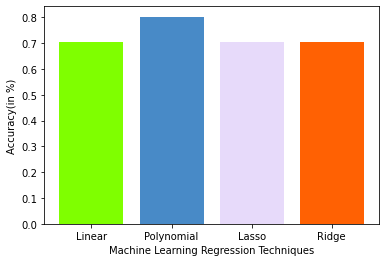

In [39]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Linear','Polynomial', 'Lasso', 'Ridge']

Accuracy = [test_r2,test_r_squared, test_r_squared_lasso, test_r_squared_ridge]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#7FFF00','#488AC7','#e7dafa','#FF6103'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

# Prediction System

In [40]:
input_age = 28
input_sex = 0
input_bmi = 33.000
input_children = 3
input_smoker = 1
input_region = 0

input_df = (input_age,input_sex,input_bmi,input_children,input_smoker,input_region)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("Medical Insurance is :",prediction)

Medical Insurance is : [6621.60276589]


In [43]:
pip install nbterm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%%terminal